## Cats VS Dogs

Setting the paths and directory for the dataset

In [1]:
import os
base_dir = 'datasets'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir,'test')

train_cats_dir = os.path.join(train_dir, 'cat')
train_dogs_dir = os.path.join(train_dir, 'dog')

val_cats_dir = os.path.join(val_dir, 'cat')
val_dogs_dir = os.path.join(val_dir, 'dog')

In [2]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg']
['dog.0.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg', 'dog.10005.jpg', 'dog.10006.jpg']


In [3]:
print('no. of cat training images:', len(os.listdir(train_cats_dir)))
print('no. of dog training images:', len(os.listdir(train_dogs_dir)))
print('no. of cat val images:', len(os.listdir(val_cats_dir)))
print('no. of dog val images:', len(os.listdir(val_dogs_dir)))

no. of cat training images: 10000
no. of dog training images: 10000
no. of cat val images: 2500
no. of dog val images: 2500


Test print some images

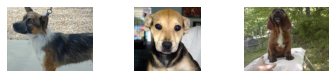

In [4]:
from matplotlib import pyplot
from matplotlib.image import imread

catfolder = 'datasets/train/cat/'
dogfolder = 'datasets/train/dog/'

for i in range(3,6):
    plot=pyplot.subplot(330 + 1 + i)
    plot.axis('Off')
    
    dogfile = dogfolder+'dog.'+str(i)+'.jpg'
    dogimg = imread(dogfile)
    pyplot.imshow(dogimg)

pyplot.show()

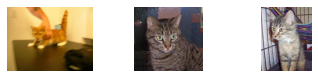

In [5]:
for i in range(3):
    plot=pyplot.subplot(330 + 1 + i)
    plot.axis('Off')

    catfile = catfolder+'cat.'+str(i)+'.jpg'
    catimg = imread(catfile)
    pyplot.imshow(catimg)

pyplot.show()

# Modeling

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


In [7]:
# prepare data generator
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare train and val flow
train_flow = train_datagen.flow_from_directory('datasets/train/', class_mode='binary', batch_size=20, target_size=(224, 224))
val_flow = datagen.flow_from_directory('datasets/val/', class_mode='binary', batch_size=20, target_size=(224, 224))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
base_model = VGG16(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [9]:
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Training

In [ ]:
# for 50 epochs
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy',metrics = ['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# using model checkpoint to save best model

In [ ]:
vgg_history = model.fit(train_flow, validation_data = val_flow, steps_per_epoch = 100, epochs = 50, callbacks=[mc])


In [10]:
# for 100 epochs
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy',metrics = ['acc'])
mc = ModelCheckpoint('best_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
vgg_history2 = model.fit(train_flow, validation_data = val_flow, steps_per_epoch = 100, epochs = 100, callbacks=[mc])


Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.7051 - acc: 0.6810
Epoch 00001: val_acc improved from -inf to 0.86560, saving model to best_model2.h5
100/100 [==============================] - 455s 5s/step - loss: 0.7051 - acc: 0.6810 - val_loss: 0.3105 - val_acc: 0.8656
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.5067 - acc: 0.7480
Epoch 00002: val_acc did not improve from 0.86560
100/100 [==============================] - 451s 5s/step - loss: 0.5067 - acc: 0.7480 - val_loss: 0.3342 - val_acc: 0.8444
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.4624 - acc: 0.7880
Epoch 00003: val_acc improved from 0.86560 to 0.87680, saving model to best_model2.h5
100/100 [==============================] - 452s 5s/step - loss: 0.4624 - acc: 0.7880 - val_loss: 0.2740 - val_acc: 0.8768
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 0.4267 - acc: 0.8105
Epoch 00004: val_acc improved from 0.87680 to 0

## Evaluation

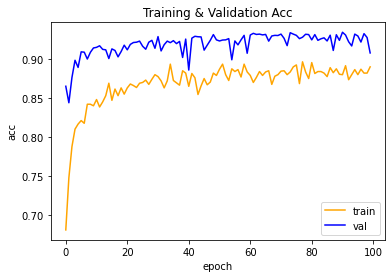

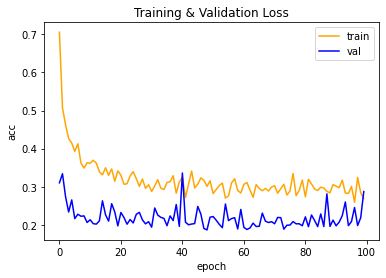

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_acc = vgg_history2.history['acc']
val_acc = vgg_history2.history['val_acc']
train_loss = vgg_history2.history['loss']
val_loss = vgg_history2.history['val_loss']

x = range(len(train_acc))

plt.title('Training & Validation Acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.plot(x, train_acc, color="orange")
plt.plot(x, val_acc, color="blue")
plt.legend(['train','val'])

plt.figure()

plt.title('Training & Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(x, train_loss, color="orange")
plt.plot(x, val_loss, color="blue")
plt.legend(['train','val'])



In [17]:
from PIL import Image
import numpy as np
from skimage import transform
def access(file):
   img = Image.open(file)
   img = np.array(img).astype('float32')/255
   img = transform.resize(img, (224, 224, 3))
   img = np.expand_dims(img, axis=0)
   return img

## Testing on a specific file if prediction works

In [18]:
test_files = os.listdir(test_dir)
    
image_file = os.path.join(test_dir,test_files[2])
image_predict = access(image_file) 

print('The file being processed is',image_file)
model.predict(image_predict)

if (model.predict(image_predict)[0][0]) <= 0.5:
    print('It is a cat')
else:
    print('It is a dog')

The file being processed is datasets\test\100.jpg
It is a cat


## Sending results into samplesubmission.csv

In [19]:
import pandas as pd

In [20]:
filenumber=[]
results=[]
for i in range(0, len(test_files)):
    file = "datasets/test/" + str(i+1) + ".jpg"
    image = access(file)
    
    filenumber.append(str(i+1))
    if model.predict(image)[0][0] <= 0.5:
        results.append(0)
    else:
        results.append(1)

df = pd.DataFrame({"id": filenumber, "label": results}, columns = ["id", "label"])
df.to_csv("sampleSubmission.csv", index= False)

## CIFAR-10 DATASET

In [21]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf

input_shape = (32, 32, 3)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# resize train set
resize_x_train = []
for img in X_train:
    resize_x_train.append(np.resize(img, input_shape) / 255)
resize_x_train = np.array(resize_x_train)
print(resize_x_train.shape)

# resize test set
resize_x_test = []
for img in X_test:
    resize_x_test.append(np.resize(img, input_shape) / 255)
resize_x_test = np.array(resize_x_test)
print(resize_x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers: 
  layer.trainable = False

last = base_model.layers[-1].output
x = layers.Flatten()(last)
x = layers.Dense(512, activation='relu', name='fc1')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax', name='predictions')(x)

cifar_model = Model(base_model.input, x)

cifar_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [23]:
cifar_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [24]:
cifar_mc = ModelCheckpoint('cifar_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
cifar_vgg_history = cifar_model.fit(resize_x_train, Y_train, batch_size = 128, validation_data = (resize_x_test, Y_test), steps_per_epoch = 100, epochs = 50, callbacks=[cifar_mc])


Epoch 1/50
100/100 [==============================] - ETA: 0s - loss: 2.2102 - acc: 0.1988
Epoch 00001: val_acc improved from -inf to 0.37970, saving model to cifar_best_model.h5
100/100 [==============================] - 32s 318ms/step - loss: 2.2102 - acc: 0.1988 - val_loss: 1.9350 - val_acc: 0.3797
Epoch 2/50
100/100 [==============================] - ETA: 0s - loss: 1.9258 - acc: 0.3186
Epoch 00002: val_acc improved from 0.37970 to 0.42330, saving model to cifar_best_model.h5
100/100 [==============================] - 31s 315ms/step - loss: 1.9258 - acc: 0.3186 - val_loss: 1.7595 - val_acc: 0.4233
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 1.7722 - acc: 0.3791
Epoch 00003: val_acc improved from 0.42330 to 0.44670, saving model to cifar_best_model.h5
100/100 [==============================] - 31s 313ms/step - loss: 1.7722 - acc: 0.3791 - val_loss: 1.6573 - val_acc: 0.4467
Epoch 4/50
100/100 [==============================] - ETA: 0s - loss: 1.6874 - acc: 0

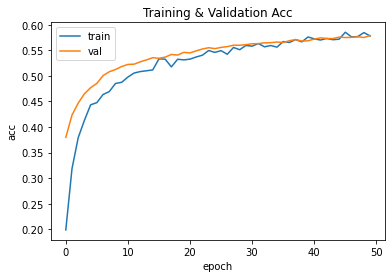

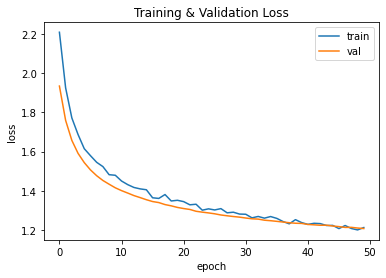

In [41]:
cifar_train_acc = cifar_vgg_history.history['acc']
cifar_val_acc = cifar_vgg_history.history['val_acc']
cifar_train_loss = cifar_vgg_history.history['loss']
cifar_val_loss = cifar_vgg_history.history['val_loss']

x = range(len(cifar_train_acc))

plt.title('Training & Validation Acc')
plt.plot(x, cifar_train_acc)
plt.plot(x, cifar_val_acc)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train','val'])


plt.figure()

plt.title('Training & Validation Loss')
plt.plot(x, cifar_train_loss)
plt.plot(x, cifar_val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
